In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/symptom2disease/Symptom2Disease.csv


In [2]:
data = pd.read_csv('/kaggle/input/symptom2disease/Symptom2Disease.csv')

In [3]:
data

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.duplicated().sum()

47

In [6]:
data = data.drop_duplicates()

In [7]:
data.shape

(1153, 2)

In [8]:
data.head()

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [9]:
data['label'].unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Psoriasis'),
  Text(1, 0, 'Varicose Veins'),
  Text(2, 0, 'Typhoid'),
  Text(3, 0, 'Chicken pox'),
  Text(4, 0, 'Impetigo'),
  Text(5, 0, 'Dengue'),
  Text(6, 0, 'Fungal infection'),
  Text(7, 0, 'Common Cold'),
  Text(8, 0, 'Pneumonia'),
  Text(9, 0, 'Dimorphic Hemorrhoids'),
  Text(10, 0, 'Arthritis'),
  Text(11, 0, 'Acne'),
  Text(12, 0, 'Bronchial Asthma'),
  Text(13, 0, 'Hypertension'),
  Text(14, 0, 'Migraine'),
  Text(15, 0, 'Cervical spondylosis'),
  Text(16, 0, 'Jaundice'),
  Text(17, 0, 'Malaria'),
  Text(18, 0, 'urinary tract infection'),
  Text(19, 0, 'allergy'),
  Text(20, 0, 'gastroesophageal reflux disease'),
  Text(21, 0, 'drug reaction'),
  Text(22, 0, 'peptic ulcer disease'),
  Text(23, 0, 'diabetes')])

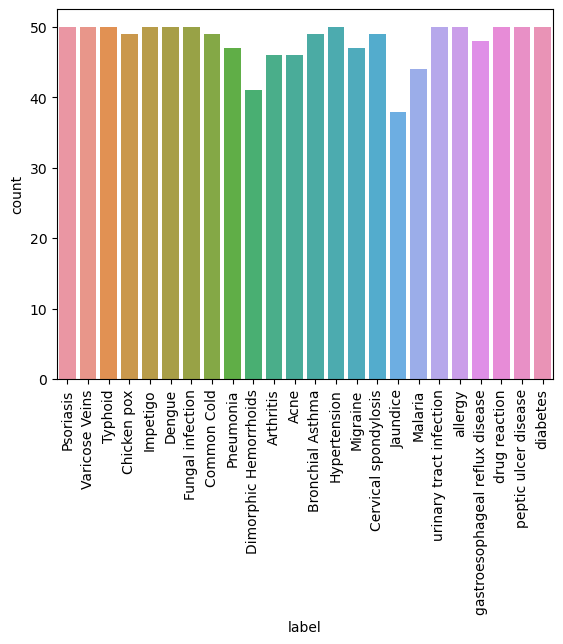

In [11]:
sns.countplot(x='label', data=data)
plt.xticks(rotation=90)

In [12]:
symp = list(data['text'])

In [13]:
len(symp)

1153

# data preprocessing

In [14]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [16]:
corpus = []

In [17]:
data=data.reset_index()

In [18]:
data.drop(['index'], axis=1, inplace=True)

In [19]:
for i in range(0, len(data)):
    sym = re.sub('[^a-zA-Z]', " ", data['text'][i])
    sym = sym.lower()
    sym = sym.split()
    
    sym = [ps.stem(word) for word in sym if word not in stopwords.words('english')]
    sym = ' '.join(sym)
    corpus.append(sym)

In [20]:
corpus

['experienc skin rash arm leg torso past week red itchi cover dri scali patch',
 'skin peel especi knee elbow scalp peel often accompani burn sting sensat',
 'experienc joint pain finger wrist knee pain often achi throb get wors move joint',
 'silver like dust skin especi lower back scalp dust made small scale flake easili scratch',
 'nail small dent pit often feel inflammatori tender touch even minor rash arm',
 'skin palm sole thicken deep crack crack pain bleed easili',
 'skin around mouth nose eye red inflam often itchi uncomfort notic inflamm nail',
 'skin sensit react easili chang temperatur humid often care product use skin',
 'notic sudden peel skin differ part bodi mainli arm leg back also face sever joint pain skin rash',
 'skin genit red inflam often itchi burn uncomfort rash differ part bodi',
 'experienc fatigu gener feel malais often feel tire lack energi even good night sleep',
 'rash skin spread part bodi includ chest abdomen itchi uncomfort often wors night also face s

In [21]:
len(corpus)

1153

In [22]:
len(data)

1153

In [23]:
len(corpus)

1153

In [24]:
# getting dependent and independent features

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
Le = LabelEncoder()

In [27]:
#Dependenet features
y=Le.fit_transform(data['label'])
y

array([15, 15, 15, ..., 19, 19, 19])

In [28]:
data[y] = list(y)

In [29]:
data

,label,text,15,17,16,4,10,6,8,5,...,13,3,11,12,23,18,21,20,22,19
0,Psoriasis,I have been experiencing a skin rash on my arm...,15,17,16,4,10,6,8,5,...,13,3,11,12,23,18,21,20,22,19
1,Psoriasis,"My skin has been peeling, especially on my kne...",15,17,16,4,10,6,8,5,...,13,3,11,12,23,18,21,20,22,19
2,Psoriasis,I have been experiencing joint pain in my fing...,15,17,16,4,10,6,8,5,...,13,3,11,12,23,18,21,20,22,19
3,Psoriasis,"There is a silver like dusting on my skin, esp...",15,17,16,4,10,6,8,5,...,13,3,11,12,23,18,21,20,22,19
4,Psoriasis,"My nails have small dents or pits in them, and...",15,17,16,4,10,6,8,5,...,13,3,11,12,23,18,21,20,22,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,diabetes,I'm shaking and trembling all over. I've lost ...,15,17,16,4,10,6,8,5,...,13,3,11,12,23,18,21,20,22,19
1149,diabetes,"Particularly in the crevices of my skin, I hav...",15,17,16,4,10,6,8,5,...,13,3,11,12,23,18,21,20,22,19
1150,diabetes,I regularly experience these intense urges and...,15,17,16,4,10,6,8,5,...,13,3,11,12,23,18,21,20,22,19
1151,diabetes,"I have trouble breathing, especially outside. ...",15,17,16,4,10,6,8,5,...,13,3,11,12,23,18,21,20,22,19


In [30]:
y.ndim

1

In [31]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500, binary=True)
X = cv.fit_transform(corpus).toarray()

In [32]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [33]:
from sklearn.metrics import accuracy_score,classification_report

In [34]:
from sklearn.naive_bayes import MultinomialNB
S2D = MultinomialNB().fit(X_train, y_train)

In [35]:
#prediction
y_pred=S2D.predict(X_test)

In [36]:
score=accuracy_score(y_test,y_pred)
print(score)

0.961038961038961


In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
rfc_pred = rfc.predict(X_test)

In [40]:
score=accuracy_score(y_test,rfc_pred)
print(score)

0.961038961038961


In [41]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500, ngram_range=(1,2))
X = tv.fit_transform(corpus).toarray()

In [42]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
rfc_pred = rfc.predict(X_test)

In [46]:
score=accuracy_score(y_test,rfc_pred)
print(score)

0.9696969696969697


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00        15
           4       1.00      0.78      0.88         9
           5       0.86      1.00      0.92         6
           6       0.90      1.00      0.95         9
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         9
          14       0.89      0.73      0.80        11
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00         4
          17       0.90    